In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

main_df = pd.read_csv('../data/raw/AB_NYC_2019.csv')
main_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [31]:
# Get Data Frame structure data
print(f"Shape:\n{main_df.shape}\n")
print(f"Info:\n{main_df.info()}")

Shape:
(48895, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review 

In [32]:
# Remove unnecesary columns
main_df = main_df.drop(columns=['host_id', 'host_name', 'calculated_host_listings_count'])
main_df.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,0


In [33]:
# Search empty data on columns
null_counts = main_df.isnull().sum()
print(null_counts)

id                         0
name                      16
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review            10052
reviews_per_month      10052
availability_365           0
dtype: int64


In [34]:
# Replace empty data
main_df['name'] = main_df['name'].fillna('No name')
main_df['reviews_per_month'] = main_df['reviews_per_month'].fillna(0)

null_counts = main_df.isnull().sum()
print(null_counts)

id                         0
name                       0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review            10052
reviews_per_month          0
availability_365           0
dtype: int64


En este caso, en la columna last_review no insertaremos 0 u otro tipo de valor en los nulos, ya que más adelante al convertir toda la columna a datetime resultará más robusto e interesante que esos valores sean NaT para poder tomarlos como fechas que no se han introducido y poder trabajar la columna como fechas.

In [35]:
# Get each column type and check if there are more than one type per column to unify them
column_types = main_df.dtypes

formatted_types = {
    column: column_types[column].name if column_types[column] != 'bool' else 'boolean' 
    for column in main_df.columns
}

def get_types_per_column(df_columns):
    for column in df_columns:
        column_types = main_df[column].apply(type).unique()
        if len(column_types) > 1:
            type_names = [t.__name__ for t in column_types]
            print(f'{column}: <{type_names}>')
        else:
            print(f'{column}: <{column_types[0].__name__}>')

get_types_per_column(main_df.columns)

id: <int>
name: <str>
neighbourhood_group: <str>
neighbourhood: <str>
latitude: <float>
longitude: <float>
room_type: <str>
price: <int>
minimum_nights: <int>
number_of_reviews: <int>
last_review: <['str', 'float']>
reviews_per_month: <float>
availability_365: <int>


In [36]:
# Clean data types
main_df['last_review'] = pd.to_datetime(main_df['last_review'], errors='coerce').dt.date

get_types_per_column(main_df.columns)

id: <int>
name: <str>
neighbourhood_group: <str>
neighbourhood: <str>
latitude: <float>
longitude: <float>
room_type: <str>
price: <int>
minimum_nights: <int>
number_of_reviews: <int>
last_review: <['date', 'NaTType']>
reviews_per_month: <float>
availability_365: <int>


In [37]:
# Count register with price 0 and remove it if necessary
print((main_df['price'] == 0).sum())
main_df = main_df[main_df['price'] != 0]

11


A continuación, teniendo los tipos de los datos establecidos y los nulos limpios, procedemos a buscar duplicados para eliminarlos o procesarlos del modo que sea necesario.

In [38]:
# Get duplicate data
def get_duplicates(df, column):
    duplicated = df[df.duplicated(subset=[column], keep=False)]
    return duplicated.groupby(column).size().reset_index(name='count')

def get_duplicated_column_data(df, column, value):
    return df[df[column]] == value

# Check that there's no id or complete content duplicated
duplicated_content =  main_df.duplicated(subset=main_df.columns.difference(['id'])).any()
print(f'Duplicated content:\n{(duplicated_content)}\n')

duplicated_id = get_duplicates(main_df, 'id')
print(f'Duplicated id:\n{duplicated_id}')

Duplicated content:
False

Duplicated id:
Empty DataFrame
Columns: [id, count]
Index: []


No se encuentra ningún id duplicado ni fila que tenga todos sus datos duplicados. Sin embargo, hacemos una búsqueda de duplicados por nombre, ya que se ha podido registrar una misma estancia varias veces erróneamente, por lo que sus valores podrían ser diferentes siendo la misma.

In [39]:
# Check if there are duplicated names and in case, check whole content of these rows
duplicated_name = get_duplicates(main_df, 'name')
print(f'Duplicated name:\n{duplicated_name}\n')

duplicated_names_list = duplicated_name['name'].drop_duplicates().tolist()

if 'No name' in duplicated_names_list:
    duplicated_names_list.remove('No name')

print(f'Duplicated names list:\n{duplicated_names_list}\n')

Duplicated name:
                                                  name  count
0    *NO GUEST SERVICE FEE* Luxury Midtown One Bedr...      2
1                      1 BR Suite in Midtown Manhattan      2
2                                 1 BR UPPER EAST SIDE      2
3                            1 Bedroom in Williamsburg      2
4               1 bedroom apartment on Columbus Avenue      2
..                                                 ...    ...
641                       west village 1BR!best value!      2
642                 ★Premier Queen Room with Balcony ★      2
643                 ✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿      2
644               ❤ of Manhattan | Fantastic 1 Bedroom      4
645                        步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐      3

[646 rows x 2 columns]

Duplicated names list:
['*NO GUEST SERVICE FEE* Luxury Midtown One Bedroom Suite with Kitchen', '1 BR Suite in Midtown Manhattan', '1 BR UPPER EAST SIDE', '1 Bedroom in Williamsburg', '1 bedroom apartment on Columb

In [40]:
# Create dict with duplicated names data frames
duplicated_names_df_dict = {}

for name in duplicated_names_list:
    filtered_df = main_df[main_df['name'] == name]
    duplicated_names_df_dict[name] = filtered_df

print(duplicated_names_df_dict)
print(main_df.info)

{'*NO GUEST SERVICE FEE* Luxury Midtown One Bedroom Suite with Kitchen':              id                                               name  \
34347  27237604  *NO GUEST SERVICE FEE* Luxury Midtown One Bedr...   
34352  27237625  *NO GUEST SERVICE FEE* Luxury Midtown One Bedr...   

      neighbourhood_group neighbourhood  latitude  longitude        room_type  \
34347           Manhattan       Midtown  40.75294  -73.96731  Entire home/apt   
34352           Manhattan       Midtown  40.75459  -73.96707  Entire home/apt   

       price  minimum_nights  number_of_reviews last_review  \
34347    737               3                  2  2019-06-07   
34352    737               3                  3  2019-06-10   

       reviews_per_month  availability_365  
34347               0.40               235  
34352               0.44               153  , '1 BR Suite in Midtown Manhattan':              id                             name neighbourhood_group  \
42776  33216329  1 BR Suite in Midtown 

Como hay muchos casos en los que los datos con nombres duplicados tienen los mismos datos, por lo que se entiende que son estancias que se han registrado múltiples veces. Por ello se procede a analizar los diferentes datos para unificarlos en una sola entrada, obteniendo medias, sumas o tratando cada uno dependiendo del contexto.

In [41]:
# Unify duplicated names registeres and process data
def unify_duplicate_data(df):
    unified_data = {
        'id': df.iloc[0]['id'],
        'name': df.iloc[0]['name'],
        'neighbourhood_group': df.iloc[0]['neighbourhood_group'],
        'neighbourhood': df.iloc[0]['neighbourhood'],
        'latitude': df.iloc[0]['latitude'],
        'longitude': df.iloc[0]['longitude'],
        'room_type': df.iloc[0]['room_type'],
        'price': df['price'].mean(skipna=True),
        'minimum_nights': df['minimum_nights'].mean(skipna=True),
        'number_of_reviews': df['number_of_reviews'].sum(skipna=True),
        'last_review': df['last_review'].dropna().max(),
        'reviews_per_month': df['reviews_per_month'].mean(skipna=True),
        'availability_365': df['availability_365'].mean(skipna=True)
    }
    
    return unified_data

unified_names_df_dict = {}

for name in duplicated_names_list:
    df = duplicated_names_df_dict[name]
    unified_data = unify_duplicate_data(df)
    unified_names_df_dict[name] = unified_data

print(unified_names_df_dict)

{'*NO GUEST SERVICE FEE* Luxury Midtown One Bedroom Suite with Kitchen': {'id': np.int64(27237604), 'name': '*NO GUEST SERVICE FEE* Luxury Midtown One Bedroom Suite with Kitchen', 'neighbourhood_group': 'Manhattan', 'neighbourhood': 'Midtown', 'latitude': np.float64(40.75294), 'longitude': np.float64(-73.96731), 'room_type': 'Entire home/apt', 'price': np.float64(737.0), 'minimum_nights': np.float64(3.0), 'number_of_reviews': np.int64(5), 'last_review': datetime.date(2019, 6, 10), 'reviews_per_month': np.float64(0.42000000000000004), 'availability_365': np.float64(194.0)}, '1 BR Suite in Midtown Manhattan': {'id': np.int64(33216329), 'name': '1 BR Suite in Midtown Manhattan', 'neighbourhood_group': 'Manhattan', 'neighbourhood': 'Midtown', 'latitude': np.float64(40.76453), 'longitude': np.float64(-73.98035), 'room_type': 'Private room', 'price': np.float64(250.0), 'minimum_nights': np.float64(1.0), 'number_of_reviews': np.int64(0), 'last_review': nan, 'reviews_per_month': np.float64(0.0

In [42]:
print(f'Main df shape before clean duplicated names: {main_df.shape}\n')

main_df = main_df[~main_df['name'].isin(duplicated_names_list)]
print(f'Main df shape after clean duplicated names: {main_df.shape}\n')

new_records_df = pd.DataFrame.from_dict(unified_names_df_dict, orient='index')
main_df = pd.concat([main_df, new_records_df], ignore_index=True)
print(f'Main df shape after add processed duplicated names: {main_df.shape}\n')


Main df shape before clean duplicated names: (48884, 13)

Main df shape after clean duplicated names: (47265, 13)

Main df shape after add processed duplicated names: (47910, 13)



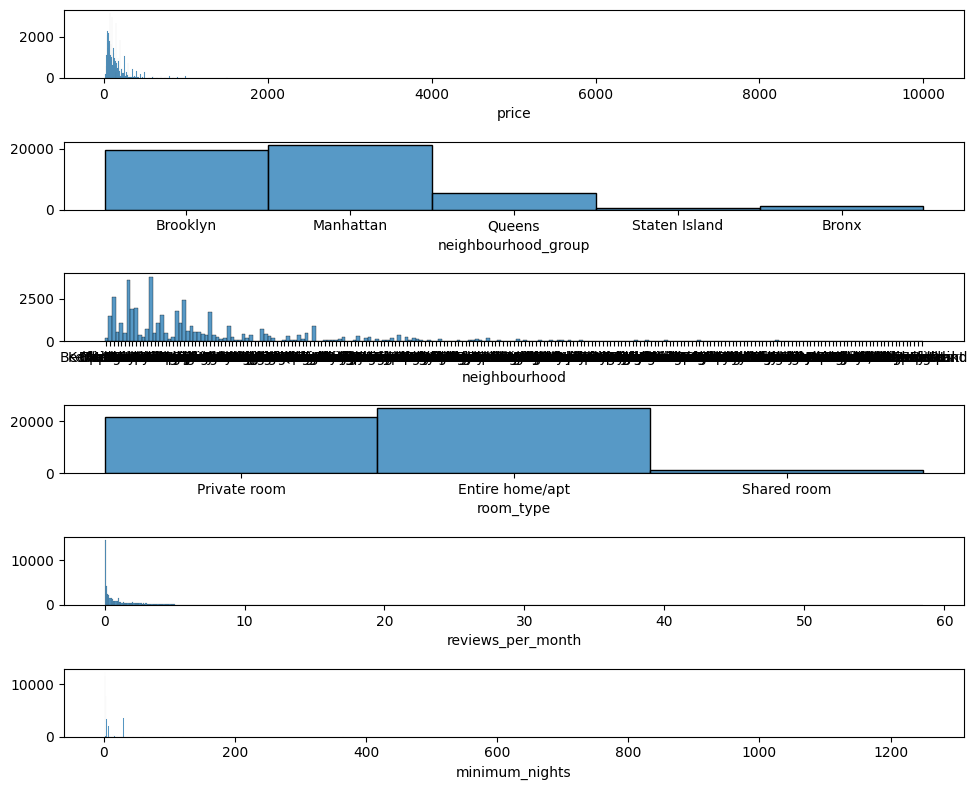

In [43]:
# Univariate analysis
fig, axis = plt.subplots(6, figsize = (10, 8))

sns.histplot(ax = axis[0], data = main_df, x = 'price').set(ylabel = None)
sns.histplot(ax = axis[1], data = main_df, x = 'neighbourhood_group').set(ylabel = None)
sns.histplot(ax = axis[2], data = main_df, x = 'neighbourhood').set(ylabel = None)
sns.histplot(ax = axis[3], data = main_df, x = 'room_type').set(ylabel = None)
sns.histplot(ax = axis[4], data = main_df, x = 'reviews_per_month').set(ylabel = None)
sns.histplot(ax = axis[5], data = main_df, x = 'minimum_nights').set(ylabel = None)

plt.tight_layout()
plt.show()

In [44]:
# Overliers analysis
main_df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,4.791000e+04,47910.000000,47910.000000,47910.000000,47910.000000,47910.000000,47910.000000,47910.000000
mean,1.893581e+07,40.729007,-73.952218,153.155662,7.002560,23.745105,1.097363,112.594674
std,1.099964e+07,0.054515,0.046088,241.711609,20.388321,45.198527,1.599009,131.154331
min,2.539000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,0.000000
25%,9.390904e+06,40.690040,-73.983107,69.000000,1.000000,1.000000,0.040000,0.000000
50%,1.955102e+07,40.723110,-73.955690,107.500000,3.000000,5.000000,0.380000,46.000000
75%,2.909631e+07,40.763157,-73.936215,175.000000,5.000000,24.000000,1.600000,225.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,666.000000,58.500000,365.000000


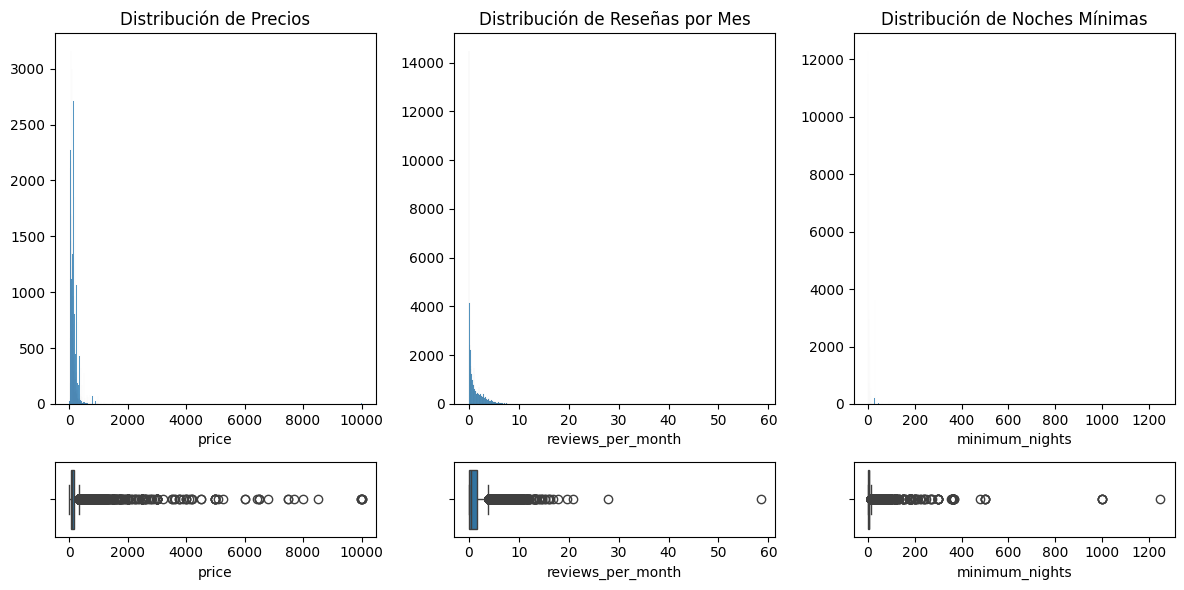

In [45]:
fig, axis = plt.subplots(2, 3, figsize=(12, 6), gridspec_kw={'height_ratios': [5, 1]})


sns.histplot(ax=axis[0, 0], data=main_df, x='price')
axis[0, 0].set_title('Distribución de Precios')
axis[0, 0].set_ylabel(None)
sns.boxplot(ax=axis[1, 0], data=main_df, x='price')
axis[1, 0].set_xlabel('price')

sns.histplot(ax=axis[0, 1], data=main_df, x='reviews_per_month')
axis[0, 1].set_title('Distribución de Reseñas por Mes')
axis[0, 1].set_ylabel(None)
sns.boxplot(ax=axis[1, 1], data=main_df, x='reviews_per_month')
axis[1, 1].set_xlabel('reviews_per_month')

sns.histplot(ax=axis[0, 2], data=main_df, x='minimum_nights')
axis[0, 2].set_title('Distribución de Noches Mínimas')
axis[0, 2].set_ylabel(None)
sns.boxplot(ax=axis[1, 2], data=main_df, x='minimum_nights')
axis[1, 2].set_xlabel('minimum_nights')

plt.tight_layout()
plt.show()


In [46]:
# Check price quartiles
price_Q1 = main_df['price'].quantile(0.25)
price_Q3 = main_df['price'].quantile(0.75)

IQR = price_Q3 - price_Q1

severe_price_lower_limit = price_Q1 - 3 * IQR
price_lower_limit = price_Q1 - 1.5 * IQR
price_upper_limit = price_Q3 + 1.5 * IQR
severe_price_upper_limit = price_Q3 + 3 * IQR

print(f'Severe lower minimun nights limit: {severe_price_lower_limit}')
print(f'Lower minimun nights limit: {price_lower_limit}')
print(f'Upper minimun nights limit: {price_upper_limit}')
print(f'Severe upper minimun nights limit: {severe_price_upper_limit}')

Severe lower minimun nights limit: -249.0
Lower minimun nights limit: -90.0
Upper minimun nights limit: 334.0
Severe upper minimun nights limit: 493.0


In [47]:
high_price = main_df[main_df['price'] >= severe_price_upper_limit]
high_price

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
84,19601,perfect for a family or small group,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800.00,1.0,25,2016-08-04,0.24,7.00
102,23686,2000 SF 3br 2bath West Village private townhouse,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500.00,4.0,46,2019-05-18,0.55,243.00
230,60164,"Beautiful, elegant 3 bed SOHO loft",Manhattan,SoHo,40.72003,-74.00262,Entire home/apt,500.00,4.0,94,2019-06-23,0.99,329.00
239,61224,Huge Chelsea Loft,Manhattan,Chelsea,40.74358,-74.00027,Entire home/apt,500.00,2.0,35,2017-07-27,0.34,348.00
295,68974,Unique spacious loft on the Bowery,Manhattan,Little Italy,40.71943,-73.99627,Entire home/apt,575.00,2.0,191,2019-06-20,1.88,298.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47702,1251889,Private Room in Williamsburg!,Brooklyn,Williamsburg,40.71490,-73.93983,Private room,568.50,184.5,22,2018-10-24,0.21,365.00
47745,1147507,RUSTIC/MODERN/EV/NYC,Manhattan,East Village,40.73032,-73.98469,Entire home/apt,750.00,3.0,9,2018-08-30,0.09,271.50
47748,1617488,Rooftop Oasis in Brooklyn for Shoots & Gigs,Brooklyn,Bedford-Stuyvesant,40.69017,-73.95757,Entire home/apt,600.00,2.0,49,2019-01-03,0.42,77.50
47779,34183825,Sonder | The Biltmore | Spacious 1BR + Kitchen,Manhattan,Theater District,40.75942,-73.98727,Entire home/apt,579.25,29.0,0,NaN,0.00,332.75


In [48]:
# Check minimum nights quartiles
minimum_nights_Q1 = main_df['minimum_nights'].quantile(0.25)
minimum_nights_Q3 = main_df['minimum_nights'].quantile(0.75)

IQR = minimum_nights_Q3 - minimum_nights_Q1

severe_minimum_nights_lower_limit = minimum_nights_Q1 - 3 * IQR
minimum_nights_lower_limit = minimum_nights_Q1 - 1.5 * IQR
minimum_nights_upper_limit = minimum_nights_Q3 + 1.5 * IQR
severe_minimum_nights_upper_limit = minimum_nights_Q3 + 3 * IQR

print(f'Severe lower minimun nights limit: {severe_minimum_nights_lower_limit}')
print(f'Lower minimun nights limit: {minimum_nights_lower_limit}')
print(f'Upper minimun nights limit: {minimum_nights_upper_limit}')
print(f'Severe upper minimun nights limit: {severe_minimum_nights_upper_limit}')

Severe lower minimun nights limit: -11.0
Lower minimun nights limit: -5.0
Upper minimun nights limit: 11.0
Severe upper minimun nights limit: 17.0


In [49]:
high_minimum_nights = main_df[main_df['minimum_nights'] >= severe_minimum_nights_upper_limit]
high_minimum_nights

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
6,5121,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.00,45.0,49,2017-10-05,0.4000,0.00
14,6090,West Village Nest - Superhost,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120.00,90.0,27,2018-10-31,0.2200,0.00
36,11452,Clean and Quiet in Brooklyn,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35.00,60.0,0,NaT,0.0000,365.00
45,12627,Entire apartment in central Brooklyn neighborh...,Brooklyn,Prospect-Lefferts Gardens,40.65944,-73.96238,Entire home/apt,150.00,29.0,11,2019-06-05,0.4900,95.00
55,14377,Williamsburg 1 bedroom Apartment,Brooklyn,Williamsburg,40.70881,-73.95930,Entire home/apt,150.00,30.0,105,2019-06-22,0.9000,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47890,4540852,Williamsburg Apartment,Brooklyn,Greenpoint,40.71910,-73.94964,Private room,107.50,127.0,1,2018-08-20,0.0225,82.75
47894,20667471,Williamsburg Penthouse,Brooklyn,Williamsburg,40.72028,-73.94152,Entire home/apt,245.50,92.5,4,2018-09-28,0.0900,86.50
47902,33930074,"Your Private Oasis In A Shared Apt, Near 3 Tra...",Queens,Ridgewood,40.70893,-73.89636,Private room,41.00,30.0,0,NaN,0.0000,291.50
47905,3339399,west village 1BR!best value!,Manhattan,West Village,40.73316,-74.00632,Entire home/apt,235.00,30.0,25,2019-05-20,0.2300,271.50


In [50]:
# Check reviews per month quartiles
reviews_per_month_Q1 = main_df['reviews_per_month'].quantile(0.25)
reviews_per_month_Q3 = main_df['reviews_per_month'].quantile(0.75)

IQR = reviews_per_month_Q3 - reviews_per_month_Q1

severe_reviews_per_month_lower_limit = reviews_per_month_Q1 - 3 * IQR
reviews_per_month_lower_limit = reviews_per_month_Q1 - 1.5 * IQR
reviews_per_month_upper_limit = reviews_per_month_Q3 + 1.5 * IQR
severe_reviews_per_month_upper_limit = reviews_per_month_Q3 + 3 * IQR

print(f'Severe lower reviews per month limit: {severe_reviews_per_month_lower_limit}')
print(f'Lower reviews per month limit: {reviews_per_month_lower_limit}')
print(f'Upper reviews per month limit: {reviews_per_month_upper_limit}')
print(f'Severe upper reviews per month limit: {severe_reviews_per_month_upper_limit}')

Severe lower reviews per month limit: -4.64
Lower reviews per month limit: -2.3
Upper reviews per month limit: 3.94
Severe upper reviews per month limit: 6.279999999999999


In [51]:
high_reviews_per_month = main_df[main_df['reviews_per_month'] >= severe_reviews_per_month_upper_limit]
high_reviews_per_month

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
460,166172,LG Private Room/Family Friendly,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60.0,3.0,480,2019-07-07,6.700,0.0
523,195233,Hospitality on Propsect Pk-12 yrs Hosting Lega...,Brooklyn,Prospect-Lefferts Gardens,40.65513,-73.95641,Private room,43.0,1.0,401,2019-07-04,6.620,43.0
542,205043,Modern Condo in Midtown,Manhattan,Theater District,40.75895,-73.98830,Private room,150.0,1.0,330,2019-06-20,7.140,111.0
1561,732700,Centrally located and spacious apt.,Manhattan,Midtown,40.75154,-73.97104,Entire home/apt,106.0,7.0,10,2019-07-06,10.000,0.0
1574,741154,Beautiful duplex loft with Skylight,Manhattan,Tribeca,40.71778,-74.00452,Entire home/apt,210.0,14.0,10,2019-07-04,10.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45974,35808578,"Sunny, Comfortably Cozy, Private Room",Brooklyn,Canarsie,40.64567,-73.89091,Private room,45.0,1.0,7,2019-07-06,7.000,68.0
45980,35811237,Centrally located spacious 1-bedroom apartment,Manhattan,Murray Hill,40.74942,-73.98170,Entire home/apt,95.0,1.0,7,2019-06-29,7.000,54.0
46418,36041065,Large bedroom with private bathroom is suit,Brooklyn,Bedford-Stuyvesant,40.68380,-73.92854,Private room,75.0,1.0,7,2019-07-06,7.000,326.0
47308,903947,Beautiful Bedroom in Manhattan,Manhattan,Harlem,40.82124,-73.93838,Private room,47.0,1.0,617,2019-06-24,6.300,284.5


In [52]:
higher_reviews_per_month = main_df[main_df['reviews_per_month'] >= 30]
higher_reviews_per_month

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
40681,32678719,Enjoy great views of the City in our Deluxe Room!,Manhattan,Theater District,40.75918,-73.98801,Private room,100.0,1.0,156,2019-07-07,58.5,299.0


In [53]:
main_df.loc[main_df['id'] == 32678719, 'reviews_per_month'] = 30.0

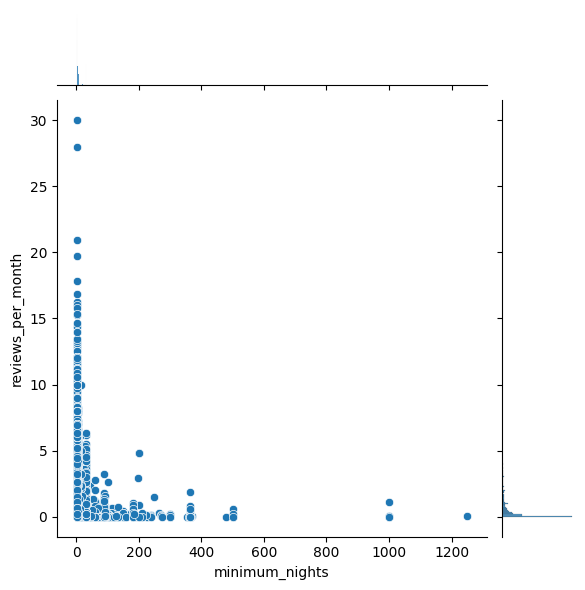

In [54]:
sns.jointplot(data=main_df, x="minimum_nights", y="reviews_per_month", kind="scatter")
plt.show()

En la columna de minimum nights vemos claros outliers, pero teniendo en cuenta que cabe la posibilidad de que muchos apartamentos o habitaciones se alquilen como larga estancia, comparamos con el número de reseñas mensuales, viendo que existe cierta relación, ya que cuando el número mínimo de noches aumenta, el de reseñas mensuales disminuye. Si contemplamos las reviews como algo que solo puede dejar un inqulino en una relación 1:1, es decir, un inquilino (o grupo de inquilinos contemplado como una unidad) puede dejar únicamente una review y una review solo puede ser dejada por un inquilino, tiene sentido que al aumentar el número mínimo de noches la cantidad de reviews mensuales disminuyan, ya que un único inquilino podría alojarse durante un periodo de tiempo mayor. En contraparte, cuando el número mínimo de noches disminuye, habrá posibilidad de que más inquilinos se alojen en esa estancia en un periodo de tiempo más corto.

En definitiva, esto puede indicar que aunque encontremos valores atípicos ya que la mayor parte de las estancias se centran en un mínimo de noches más reducido, los outliers en este caso no tienen necesariamente que implicar un error.

Sin embargo, respecto al número de reseñas mensuales encontramos un único outlier extremo de 58 reviews por mes, lo que parece ser una errata ya que contemplando que un inquilino debe quedarse al menos una noche, es imposible que se hayan dejado casi 60 reseñas a lo largo de un mes.

In [55]:
route = '../data/raw/PROCESSED_DF.csv'
main_df.to_csv(route, index=False)

Teniendo el dataset procesado, pasamos a almacenarlo en un csv para poder seguir trabajándolo y ver los datos de un modo más gráfico en otro ipynb, ya que de este modo la información quedará más limpia.